In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

In [78]:
!python3 preprocessing1.py

mya.txt
mya
amh.txt
amh
guj.txt
guj
.DS_Store
sin.txt
sin
cop.txt
cop
khm.txt
khm
chr.txt
chr
syr.txt
syr
tel.txt
tel
arm.txt
arm
tha.txt
tha
lao.txt
lao
tib.txt
tib
shavian.txt
shavian
tam.txt
tam
mal.txt
mal
cls.txt
cls
kor.txt
kor
kan.txt
kan
pan.txt
pan
vai.txt
vai
preprocessing1.py:102: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  res_full = pd.concat(dfs)
preprocessing1.py:105: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  res_full = pd.DataFrame(res_full.groupby(['lang', 'unicode', 'textfile'])['Freq'].\
preprocessing1.py:129: FutureWarning: Sorting because non-concatenation axis is not aligned. A futur

In [79]:
data = pd.read_csv('final.csv', index_col=0)
data.head(4)

,Ancestor,Family,Freq,Idiosyncratic,LengthScript,PCComplexity,Rel_freq,Sum_count,Sum_prob,Type,compressed,file,folder,index,lang,textfile
0,Phnx,Phoenician,196.0,0,84,25.769892,0.000112,1754307.0,1.0,alphabet,1072,7.0,Grek,00390,ell,ΐ
1,Phnx,Phoenician,32076.0,0,84,54.597666,0.018284,1754307.0,1.0,alphabet,1472,7.0,Grek,003AC,ell,ά
2,Phnx,Phoenician,30697.0,0,84,41.360042,0.017498,1754307.0,1.0,alphabet,1203,7.0,Grek,003AD,ell,έ
3,Phnx,Phoenician,15128.0,0,84,51.388589,0.008623,1754307.0,1.0,alphabet,1132,7.0,Grek,003AE,ell,ή


Data shape:

In [80]:
data.shape

(2775, 16)

Check the number of characters in each script:

In [81]:
data.\
groupby(['lang', 'folder'])['LengthScript'].\
size()

lang     folder
amh      Ethi       251
arb      Arab        36
arm      Armn        37
ben      Beng        42
chr      Cher        84
cls      Cans       126
cop      Copt        24
ell      Grek        36
guj      Gujr        44
hbo      Hebr        27
heb      Hebr        27
kan      Knda        46
kat      Geor        33
khm      Khmr        42
kor      Hang      1239
lao      Laoo        33
mal      Mlym        48
mya      Mymr        40
ory      Orya        45
pan      Guru        42
shavian  Shaw        48
sin      Sinh        51
syr      Syrc        22
tam      Taml        34
tel      Telu        47
tha      Thai        51
tib      Tibt        33
vai      Vaii       187
Name: LengthScript, dtype: int64

Check that frequencies sum up to one:

In [82]:
data.groupby(['lang', 'folder'])\
.sum()[['Rel_freq']]\
.reset_index()

,lang,folder,Rel_freq
0,amh,Ethi,1.0
1,arb,Arab,1.0
2,arm,Armn,1.0
3,ben,Beng,1.0
4,chr,Cher,1.0
5,cls,Cans,1.0
6,cop,Copt,1.0
7,ell,Grek,1.0
8,guj,Gujr,1.0
9,hbo,Hebr,1.0


Text sizes:

In [83]:
data.groupby(['lang', 'folder']).\
sum()[['Freq']].\
reset_index().\
sort_values(by='Freq', ascending=False)

,lang,folder,Freq
25,tha,Thai,2942793.0
23,tam,Taml,2206361.0
11,kan,Knda,2071105.0
16,mal,Mlym,2031471.0
21,sin,Sinh,1932016.0
24,tel,Telu,1861883.0
8,guj,Gujr,1861081.0
7,ell,Grek,1754307.0
0,amh,Ethi,1670566.0
17,mya,Mymr,1608394.0


Frequency-rank plots for each script:

Text(0, 0.5, 'Frequency (log-transformed)')

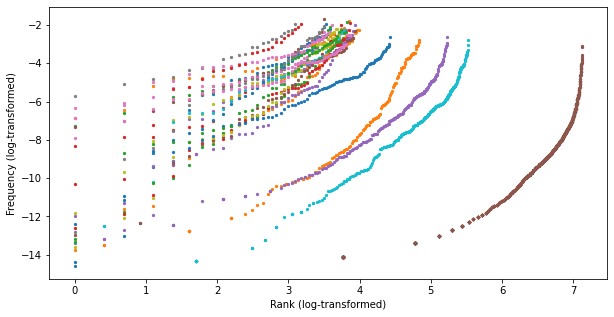

In [84]:
plt.figure(figsize=(10, 5))
for i in data.folder.unique():
    df = data[data.folder == i]
    df['rank'] = df['Freq'].rank()
    plt.scatter(np.log(df['rank']), np.log(df['Rel_freq']), s=5)
plt.xlabel('Rank (log-transformed)')
plt.ylabel('Frequency (log-transformed)')